In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
df = pd.read_csv("/content/BankChurners.csv")
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)
df = df.drop (['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.dtypes.value_counts()

int64      10
object      6
float64     5
dtype: int64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
#Target Kolom = Attrition_Flag
#Mengubah Existing Customer : 0 dan Attrited Customer : 1
df['Attrition_Flag']=df['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


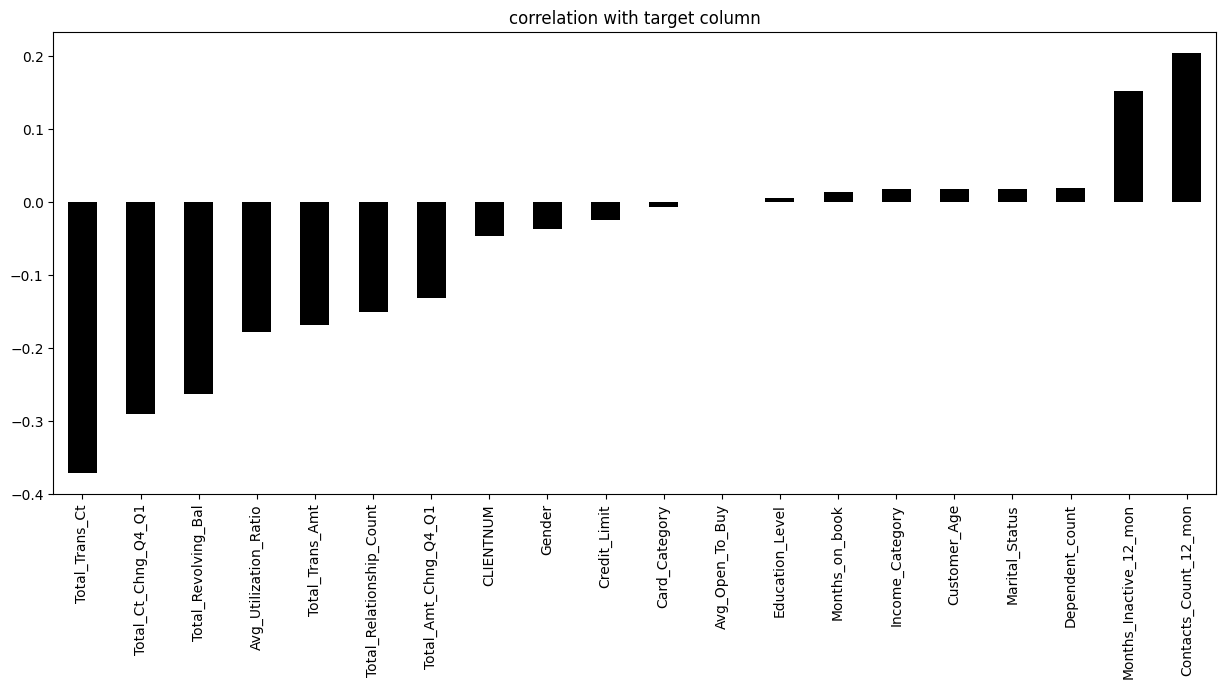

In [ ]:
#Melihat Korelasi Semua Kolom dengan Target Kolom
plt.figure(figsize=(15,6),dpi=100)
df.corr()['Attrition_Flag'].sort_values()[:-1].plot(kind='bar',color = 'black')
plt.title('correlation with target column');

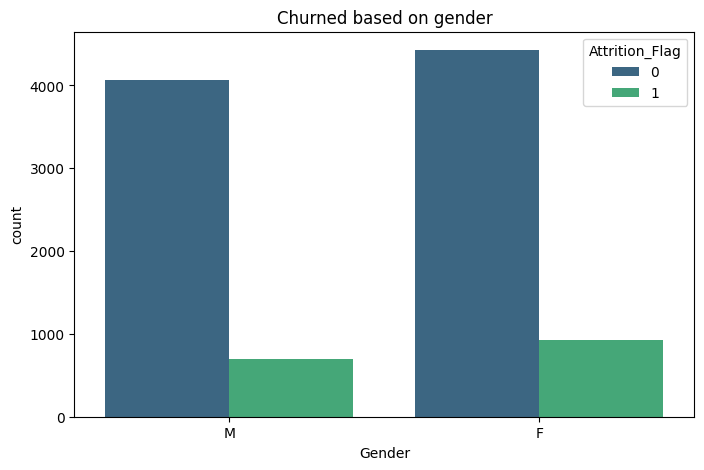

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(data=df,x='Gender',hue='Attrition_Flag',palette='viridis')
plt.title('Churned based on gender');

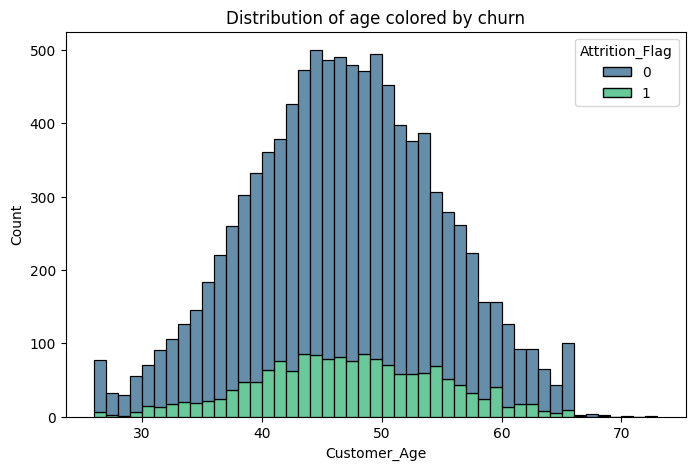

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sns.histplot(data=df,x='Customer_Age',hue='Attrition_Flag',multiple='stack',palette='viridis')
plt.title('Distribution of age colored by churn');

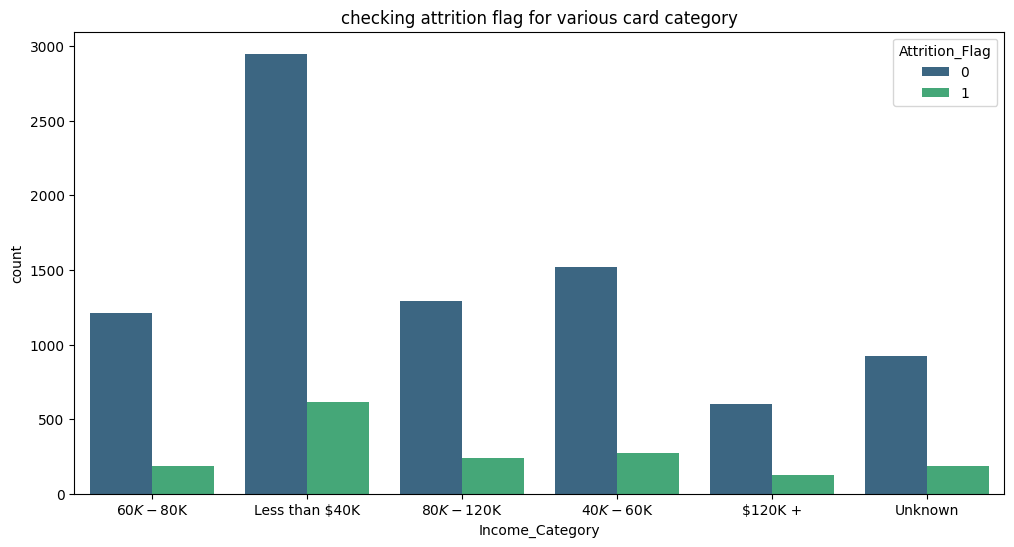

In [ ]:
#plotting count plot for various card category
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='Income_Category',hue='Attrition_Flag',palette='viridis')
plt.title('checking attrition flag for various card category');

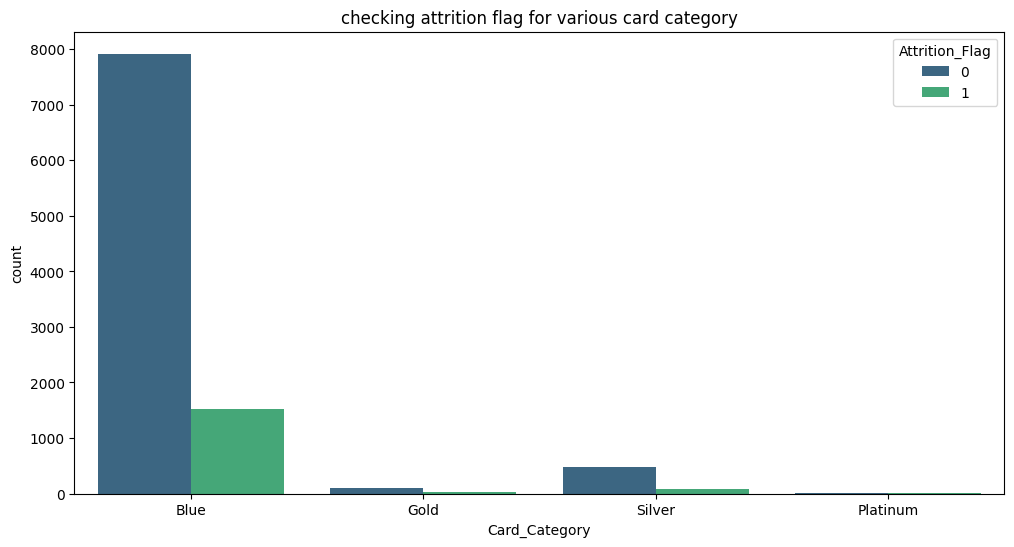

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='Card_Category',hue='Attrition_Flag',palette='viridis')
plt.title('checking attrition flag for various card category');

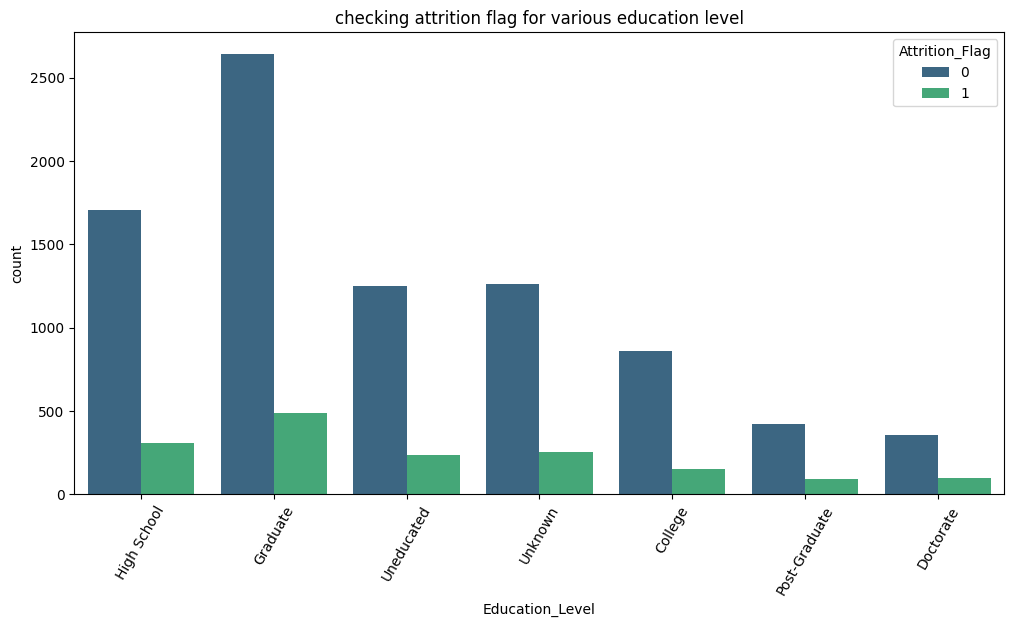

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag',palette='viridis')
plt.xticks(rotation = 60)
plt.title('checking attrition flag for various education level');

Customer yang Churned tertinggi sesuai kategori :
Gender : Female \\
Customer_Age : 40-50 \\
Income Category : Less than $40k \\
Card_Category : Blue \\
Education_Level : Graduate \\

In [ ]:
#Me-transform data categorical ke numerik
col_string = df.select_dtypes(include=['object'])
le = LabelEncoder()
col = []
for i in col_string.columns:
  col.append(i)
df[col]=df[col].apply(LabelEncoder().fit_transform)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,2,2,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,6,0,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,3,1,4,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,2,3,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
# Memilih fitur-fitur yang relevan dan variabel target
features = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
target = df['Attrition_Flag']

# Mengonversi fitur-fitur kategorikal menjadi label numerik
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Mengonversi fitur-fitur kategorikal menjadi variabel dummy
features = pd.get_dummies(features)

# Normalisasi fitur-fitur
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Mengonversi variabel target menjadi kategori
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Membuat model ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=19, batch_size=32, verbose=1)

# Mengevaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print("Nilai loss pada data uji:", loss)
print("Akurasi pada data uji:", accuracy)

Epoch 1/19
254/254 [==============================] - 2s 2ms/step - loss: 0.2823 - accuracy: 0.8887
Epoch 2/19
254/254 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9142
Epoch 3/19
254/254 [==============================] - 1s 3ms/step - loss: 0.1791 - accuracy: 0.9298
Epoch 4/19
254/254 [==============================] - 1s 3ms/step - loss: 0.1620 - accuracy: 0.9340
Epoch 5/19
254/254 [==============================] - 1s 2ms/step - loss: 0.1536 - accuracy: 0.9369
Epoch 6/19
254/254 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9412
Epoch 7/19
254/254 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9436
Epoch 8/19
254/254 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9451
Epoch 9/19
254/254 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9467
Epoch 10/19
254/254 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9504